# 비지도학습

비지도학습은 지금까지와는 달리 답지가 없이 데이터의 특성에 따라 분류하는 방법이다. 여기서부터 진짜 연구의 영역이다. 우리는 비지도학습 중 군집화(Clustering) 기법 두 가지를 배운다.

1. K-Means
2. 실루엣 계수
3. DBSCAN

## K-Means

K-Means는 군집화 알고리즘 중 가장 널리 사용되는 방법 중 하나로, 데이터를 K개의 클러스터로 나누는 방법이다. K-Means의 기본 아이디어는 각 데이터 포인트를 가장 가까운 클러스터 중심(centroid)에 할당하고, 클러스터 중심을 업데이트하는 과정을 반복하는 것이다.

K-Means는 다음과 같은 단계로 작동한다:

1. **초기화**: K개의 클러스터 중심을 무작위로 선택한다.
2. **할당 단계**: 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당한다.
3. **업데이트 단계**: 각 클러스터의 중심을 해당 클러스터에 속한 데이터 포인트들의 평균으로 업데이트한다.
4. **수렴 검사**: 클러스터 중심이 더 이상 변화하지 않거나, 최대 반복 횟수에 도달할 때까지 2단계와 3단계를 반복한다.
5. **결과 출력**: 최종 클러스터 중심과 각 데이터 포인트의 클러스터 할당 결과를 출력한다.


C:\ProgramData\anaconda3\envs\mlbase-py3.12\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\envs\mlbase-py3.12\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


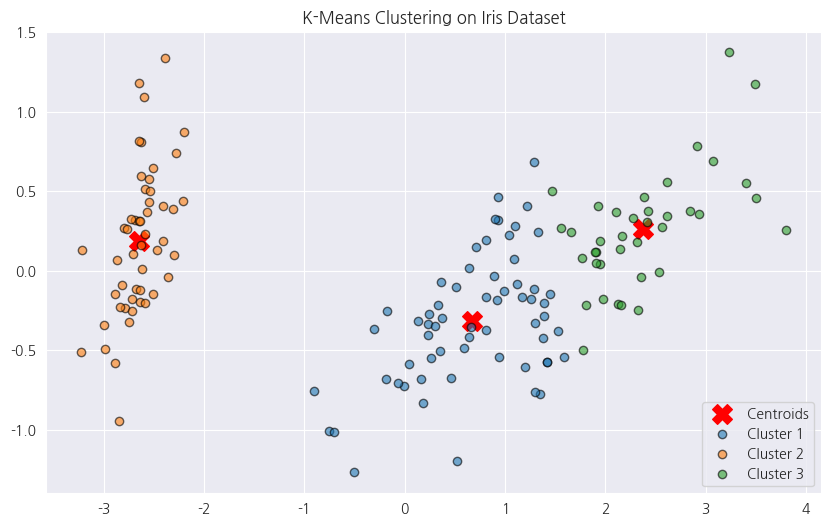

In [1]:
from seaborn import load_dataset
import matplotlib.pyplot as plt
import koreanize_matplotlib

# # set OMP_NUM_THREADS=1
# # OMP_NUM_THREADS 환경 변수를 1로 설정하여 멀티스레딩을 방지합니다.
# import os
# os.environ["OMP_NUM_THREADS"] = "1"

# 데이터 불러오기
iris = load_dataset("iris")
iris = iris.drop(columns=["species"])  # species 컬럼 제거

# K-Means 알고리즘을 적용하기 위해 sklearn 라이브러리에서 KMeans 클래스를 불러옵니다.
from sklearn.cluster import KMeans

# K-Means 모델 생성
kmeans = KMeans(n_clusters=3)  # n_clusters = 예상 클러스터 개수 - 이것때문에 지도학습이라고 주장하는 사람도 있음. 반박시 니말이 맞음 하고 넘어갈 것.
kmeans.fit(iris)  # 학습
centroids = kmeans.cluster_centers_  # 클러스터 중심점 좌표 (아직 4차원)

# 시각화를 위해 PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)
centroids_pca = pca.transform(centroids)

# 분류한 클러스터 결과 번호들
labels = kmeans.labels_

# 시각화
plt.figure(figsize=(10, 6))
plt.title('K-Means Clustering on Iris Dataset')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
for i in range(3):
    plt.scatter(iris_pca[labels == i, 0], iris_pca[labels == i, 1], edgecolor='k', label=f'Cluster {i+1}', alpha=0.6)

# 라벨들
plt.legend()

plt.show()

## Practice 2. 펭귄

1. 펭귄 데이터를 불러와서 전처리 후 species 컬럼을 제거
2. K-Means 알고리즘을 적용하여 3개의 클러스터로 분류
3. 클러스터링 결과와 중심을 시각화

## 실루엣 계수

실루엣 계수(Silhouette Coefficient)는 군집화의 품질을 평가하는 지표로, 각 데이터 포인트가 자신의 클러스터와 얼마나 잘 어울리는지를 측정한다. 실루엣 계수는 -1에서 1 사이의 값을 가지며, 값이 클수록 클러스터링이 잘 이루어졌음을 나타낸다.

0.5 이상이면 제법 잘 클러스터링 되었다고 판단한다.

구형 군집에는 잘 동작하지만, 비구형 군집에는 잘 동작하지 않는다.

In [ ]:
from sklearn.metrics import silhouette_score
# 실루엣 계수 계산
silhouette_avg = silhouette_score(iris, labels)
print(f'Silhouette Coefficient: {silhouette_avg:.2f}')

## 엘보우 방법

엘보우 방법(Elbow Method)은 K-Means 클러스터링에서 최적의 클러스터 개수를 찾기 위한 방법이다. 이 방법은 클러스터 개수가 증가함에 따라 클러스터 내 제곱합(Sum of Squared Errors, SSE)이 감소하는 경향을 이용한다. SSE는 각 데이터 포인트와 해당 클러스터 중심 간의 거리의 제곱합을 의미한다.

엘보우 방법의 단계는 다음과 같다:

1. K-Means 클러스터링을 여러 개의 K 값(예: 1부터 10까지)에 대해 수행한다.
2. 각 K 값에 대해 SSE를 계산한다.
3. K 값과 SSE 값을 그래프로 나타낸다.
4. 그래프에서 SSE가 급격히 감소하다가 완만해지는 (`꺾이는`) 지점을 찾는다. 이 지점이 최적의 K 값으로 간주된다.



In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris)
    sse.append(kmeans.inertia_)  # inertia는 클러스터 내 제곱합(SSE)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.show()
